In [1]:
#Import needed libraries
import numpy as np 
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import os

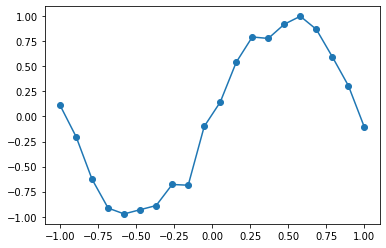

In [52]:
#Prepare the training set 
x_train = np.linspace(start=-1, stop=1, num=20)
y_train = [np.sin(np.pi*x) for x in x_train]
y_train = [y+np.random.normal(loc=0, scale=0.075) for y in y_train]
y_train = np.array(y_train)
#x_test = np.linspace(start=-0.95, stop=0.95, num=10)
#y_test = [np.sin(np.pi*x) for x in x_test]
#y_test = [y+np.random.normal(loc=0, scale=0.075) for y in y_test]
#y_test = np.array(y_test)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train)
#plt.scatter(x_test, y_test)
plt.show()

In [5]:
def fit_this_ANN(nHL, nn, actHL, nepochs):
  '''This function recieves a number of hidden layers nHL which must be 1, 2, 3 or 4, the number of neurons in each hidden layer, which must be a tuple or a list with nHL integers''' 
  if type(nHL)!=type(1):
    print('Not allowed type for number of layers nHL, returning -1')
    return -1
  if nHL<1 or nHL>4:
    print('Not allowed value for number of layers nHL, returning -1')
    return -1
  if type(nn)!=type(()) and type(nn)!=type([]):
    print('Not allowed type for nn, returning -1')
    return -1
  nn = np.array(nn, dtype=int)
  if np.ndim(nn)!=1 or np.size(nn)!=nHL:
    print('Not allowed ndim or size for nn, returning -1')
    return -1
  if type(actHL)!=type(''):
    print('Not allowed type for actHL, returning -1')
    return -1
  if type(nepochs)!=type(1):
    print('Not allowed type for nepochs, returning -1')
    return -1
  if nepochs<0:
    print('Not allowed value for nepochs, returning -1')
    return -1
  
  model = Sequential()
  model.add(Dense(units=nn[0], activation=actHL, input_shape=(1,)))
  if nHL>1:
    model.add(Dense(units=nn[1], activation=actHL))
  if nHL>2:
    model.add(Dense(units=nn[2], activation=actHL))
  if nHL>3:
    model.add(Dense(units=nn[3], activation=actHL))
  model.add(Dense(units=1, activation='linear'))
  model.compile(loss='MeanSquaredError')
  historia=model.fit(x_train, y_train, batch_size=20, epochs=nepochs, verbose=0)
  return historia.history['loss'], model

  
  


Text(0, 0.5, 'Mean Squared Loss')

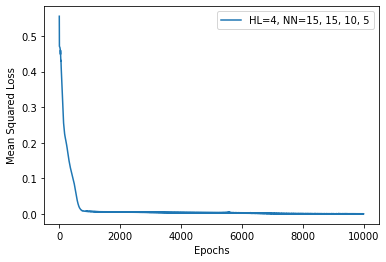

In [56]:
Nepochs=10000
activationF='sigmoid'
loss, model_1 = fit_this_ANN(4,[200,100,50,5],activationF,Nepochs)
plt.plot(loss, label='HL=4, NN=15, 15, 10, 5')
plt.legend(loc='upper right', frameon=True)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Loss')
#plt.savefig('loss.eps', format='eps')
#plt.savefig('loss.png', format='png')
#plt.show()


Text(0, 0.5, 'Mean Squared Loss')

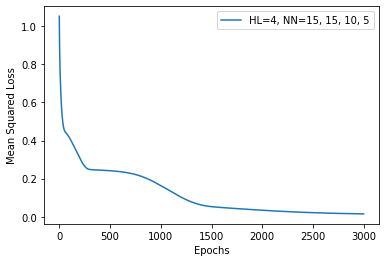

In [57]:
Nepochs=3000
activationF='sigmoid'
loss, model_2 = fit_this_ANN(2,[20,10],activationF,Nepochs)
plt.plot(loss, label='HL=4, NN=15, 15, 10, 5')
plt.legend(loc='upper right', frameon=True)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Loss')
#plt.savefig('loss.eps', format='eps')
#plt.savefig('loss.png', format='png')
#plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


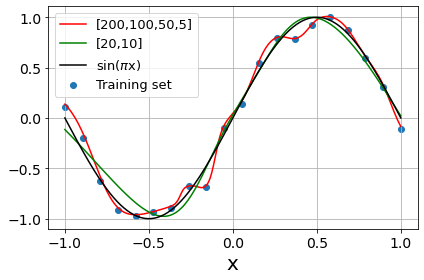

In [81]:
x_test = np.linspace(start=-1,stop=1,num=200)
plt.plot(x_test, model_1.predict(x_test), label='[200,100,50,5]', color='red')
plt.plot(x_test, model_2.predict(x_test), label='[20,10]', color='green')
plt.plot(x_test, np.sin(np.pi*x_test), label='sin($\pi$x)', color='black')
plt.scatter(x_train, y_train, label='Training set')
plt.legend(loc='upper left', frameon=True, fontsize=13)
plt.xlabel('x', fontsize=20)
plt.xticks(fontsize=14, ticks=np.linspace(start=-1, stop=1, num=5))
plt.yticks(fontsize=14, ticks=np.linspace(start=-1, stop=1, num=5))
plt.tight_layout()
plt.grid()
plt.savefig('overfitting.eps', format='eps')
plt.show()


In [21]:
print(os.path.abspath('.'))

/home/julio/Documents/jupyterenvironment/TFM/code/toy_model/overfitting


Observaciones:

N=20000 epochs

  Partición de 50 puntos en [-1,1]

    nHL = 1, nn=2, 6, 10
    
      No hay overfitting y la loss function termina siendo bastante plana
    
    nHL = 2, nn=[4,4], [10,4]

      No hay overfitting y la loss function termina siendo bastante plana

  Partición de 30 puntos en [-1,1]

    nHL = 2, [10,4]

      Se comienza a observar el overfitting. LF termina siendo bastante plana.

    nHL = 3, [10,4,4]

      Se observa el overfitting bien solo en una parte de los datos. Por parte de los datos me refiero a uno de los intervalos de entre [-1,0], [0,1]. En la otra parte de los datos no hay fitting ni overfitting (se comporta mal).

    nHL = 3, [10,10,4]

      Se observa el overfitting a todos los datos muy bien.


